In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

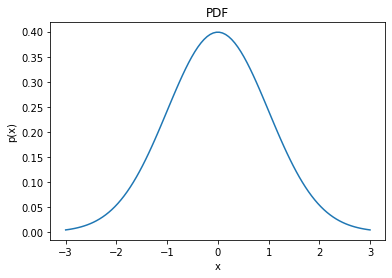

In [2]:
# Exercise 1
#1.a
x = np.linspace(-3,3,100)
mu=0
sigma=1
pdf_x = (1/np.sqrt(2*np.pi*(sigma**2)))*np.exp(-((x-mu)**2)/(2*(sigma**2)))
fig1,ax1 = plt.subplots()
ax1.set_xlabel('x')
ax1.set_ylabel('p(x)')
ax1.set_title('PDF')
ax1.plot(x,pdf_x)
plt.show()

mean: -0.045256707490195384
standard deviation: 0.9870331586690257


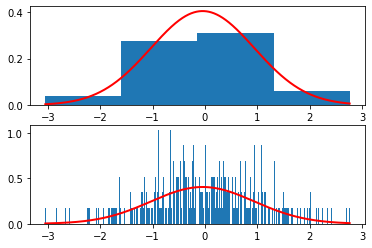

In [3]:
#1.b
np.random.seed(0) #fixed seed to ensure the constant result
fig2,ax2 = plt.subplots(2,1)
#1.b-1
sample = np.random.normal(mu,sigma,1000)
#1.b-2
mu_1,sig_1 = norm.fit(sample)
y_value = norm(mu_1, sig_1)
#1.b-3
x = np.linspace(min(sample),max(sample), 1000)
ax2[0].hist(sample,4,density=True)
ax2[0].plot(x,y_value.pdf(x),'r-', lw=2, label='norm pdf')
ax2[1].hist(sample,1000,density=True)
ax2[1].plot(x,y_value.pdf(x),'r-', lw=2, label='norm pdf')
print("mean: {}".format(mu_1))
print("standard deviation: {}".format(sig_1))
plt.show()

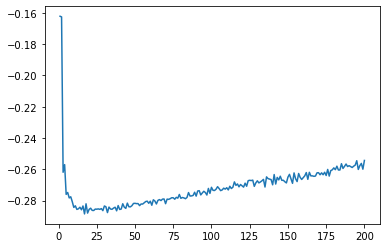

In [4]:
#1.c-1
mu=0
sigma=1
sample_num=1000
sample = np.random.normal(mu,sigma,sample_num)
J_h=[]
for m in range(1,201):
    hist, edge = np.histogram(sample,m,density=True)
    bin_width = edge[1] - edge[0]
    h = (max(sample) - min(sample))/m
    sum_p=0
    for each_p in hist:
        sum_p += (each_p*bin_width)**2
    J_hat_h = 2/(h*(sample_num-1)) - ((sample_num+1)/(h*(sample_num-1)))*sum_p
    J_h.append(J_hat_h)
fig3,ax3 = plt.subplots()
ax3.plot(np.linspace(1,200,200),J_h)



In [5]:
#1.c-2
m_star = J_h.index(min(J_h))
print(m_star)

16


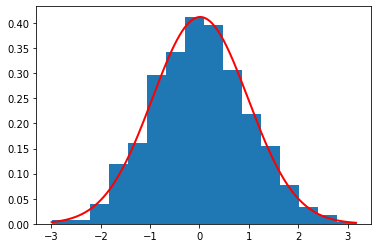

In [6]:
#1.c-3
fig4,ax0 = plt.subplots()
ax0.hist(sample,m_star,density=True)

x = np.linspace(min(sample),max(sample), 1000)
mu_3,sig_3 = norm.fit(sample)
y_value = norm(mu_3, sig_3)
ax0.plot(x,y_value.pdf(x),'r-', lw=2, label='norm pdf')
plt.show()

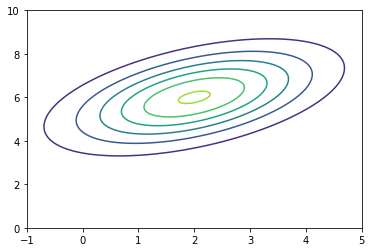

In [7]:
# Exercise 2
#2-a
def f(x1,x2):
    return (1/np.sqrt(12*((np.pi)**2)))*np.exp(-(((x1**2)/3)+((x2**2)/3)+(2*x1/3)-(10*x2/3)-(x1*x2/3)+(28/3)))

x1=np.linspace(-1,5,100)
x2=np.linspace(0,10,100)
X,Y=np.meshgrid(x1,x2)
Z=f(X,Y)
plt.contour(X,Y,Z)
plt.show()



[[1. 0.]
 [0. 1.]]


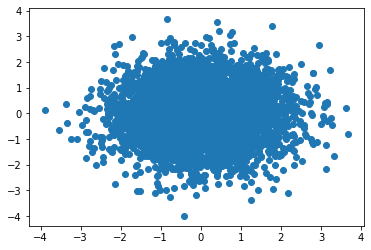

In [17]:
#2-c-i
mean = [0,0]
cov = np.identity(2)
print(cov)
sample = np.random.multivariate_normal(mean,cov,5000)
x,y = sample.T
plt.scatter(x,y)

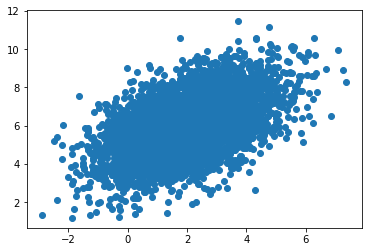

In [81]:
#2-c-ii
# from part b-iv, we know that b = [2, 6]'; A can be calculated through a cholesky facorization
b = np.array([2,6])
A = np.array([[np.sqrt(6)/2, -1/np.sqrt(2)],[np.sqrt(6)/2, 1/np.sqrt(2)]])
Y = []
new_x, new_y = np.add(np.matmul(A,sample.T).T,b).T
plt.scatter(new_x,new_y)

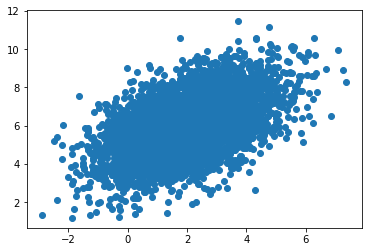

In [82]:
cov = np.array([[2,1],[1,2]])
b = np.array([2,6])
w,v = np.linalg.eig(cov)
dia =np.sqrt(np.diag(w))
trans = (v@dia)
x_check, y_check = np.add(np.matmul(trans,sample.T).T,b).T
plt.scatter(x_check,y_check)

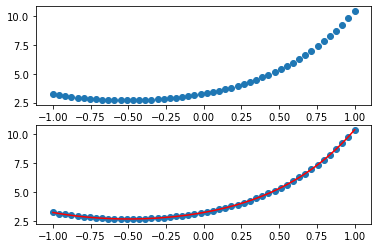

In [127]:
# Exercise 3
# 3-a
mu = 0
sig = 0.01
x = np.linspace(-1,1,50)
beta = np.array([-0.001, 0.01, 0.55, 1.5, 1.2])
Ls = np.array([eval_legendre(x,1), eval_legendre(x,1), eval_legendre(x,2), eval_legendre(x,3), eval_legendre(x,4)])
err = np.random.normal(mu, sig, 1)
y = beta@Ls+err
fig,ax0 = plt.subplots(2,1)
ax0[0].scatter(x,y)

# 3-c
beta_fit = np.linalg.lstsq(Ls.T,y,rcond=None)[0]
new_y = Ls.T@beta_fit
ax0[1].scatter(x,y)
ax0[1].plot(x,new_y,color="r")


[ -11.14410846  -11.14410846   90.63370244 -110.84865124   45.95483665]


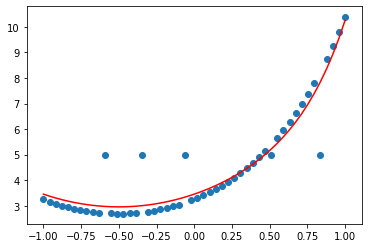

In [129]:
# 3-d
idx = [10, 16, 23, 37, 45]
new_y[idx] = 5
beta_fit_noise = np.linalg.lstsq(Ls.T,new_y,rcond=None)[0]
new_y_noise = Ls.T@beta_fit_noise
plt.scatter(x,new_y)
plt.plot(x,new_y_noise,color="r")


In [ ]:
# 3-e

